# Finding Template Image in Target Image

In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'BGR Channel Target Image')

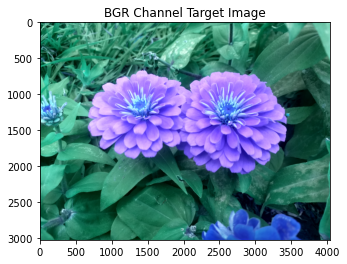

In [21]:
target_img = cv.imread('../Image Processing/Images/Target_Image.jpg')
plt.imshow(target_img)
plt.title('BGR Channel Target Image')

Text(0.5, 1.0, 'RGB Channel Target Image')

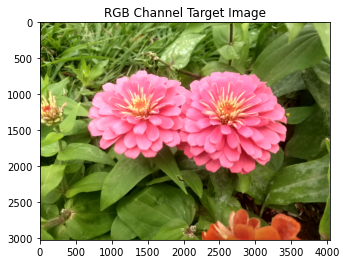

In [22]:
target_img_RGB = cv.cvtColor(target_img, cv.COLOR_BGR2RGB)
plt.imshow(target_img_RGB)
plt.title('RGB Channel Target Image')

Text(0.5, 1.0, 'GRAY Channel Target Image')

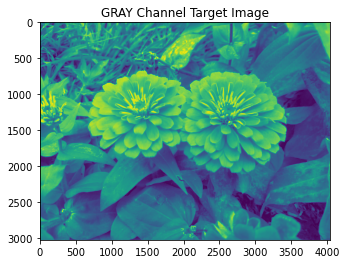

In [23]:
target_img_GRAY = cv.cvtColor(target_img, cv.COLOR_BGR2GRAY)
plt.imshow(target_img_GRAY)
plt.title('GRAY Channel Target Image')

Text(0.5, 1.0, 'BGR Channel Template Image')

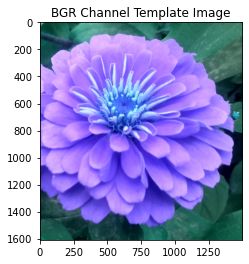

In [24]:
template_img = cv.imread('../Image Processing/Images/Template_Image.jpg')
plt.imshow(template_img)
plt.title('BGR Channel Template Image')

Text(0.5, 1.0, 'RGB Channel Template Image')

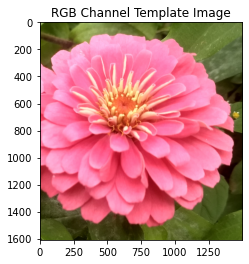

In [25]:
template_img_RGB = cv.cvtColor(template_img, cv.COLOR_BGR2RGB)
plt.imshow(template_img_RGB)
plt.title('RGB Channel Template Image')

Text(0.5, 1.0, 'GRAY Channel Template Image')

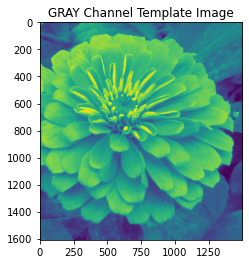

In [26]:
template_img_GRAY = cv.cvtColor(template_img, cv.COLOR_BGR2GRAY)
plt.imshow(template_img_GRAY)
plt.title('GRAY Channel Template Image')

In [27]:
method = cv.TM_SQDIFF #As we are using TM_SQDIFF we will use gray images as this method is best suited or gray scale images.
result = cv.matchTemplate(target_img_GRAY, template_img_GRAY, method)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)
print('min_val: {}, max_val: {}, min_loc: {}, max_loc: {} '.format(min_val, max_val, min_loc, max_loc))

min_val: 1908736.0, max_val: 15575400448.0, min_loc: (2001, 601), max_loc: (1297, 1415) 


Text(0.5, 1.0, 'Heat Map Image of Min Location where image is found marked in blue dot')

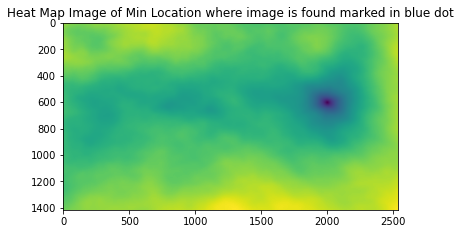

In [28]:
plt.imshow(result)
plt.title('Heat Map Image of Min Location where image is found marked in blue dot')

In [29]:
confidence = (9999999999 - min_val) / 100000000
altconfidence = 100 - ((min_val / max_val)*100)
print ('confidence value:: {:0.3f}'.format(confidence))
print ('altconfidence value:: {:0.3f}'.format(altconfidence))

confidence value:: 99.981
altconfidence value:: 99.988


In [30]:
h, w = template_img_GRAY.shape
print('h: {}, w: {}'.format(h,w))

h: 1609, w: 1497


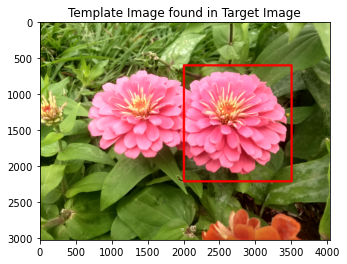

In [31]:
if (confidence>98) and (altconfidence > 95):
    top_left = min_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(target_img_RGB,top_left, bottom_right, (255,0,0), 30)
    plt.imshow(target_img_RGB)
    plt.title('Template Image found in Target Image')
else:
    print('Template Image not present on Target Image')

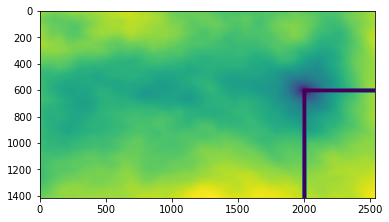

In [32]:
cv.rectangle(result,top_left, bottom_right, (255,0,0), 30)
plt.imshow(result)